## Assignment 3a: A-priori algorithm

### Zisan Aalam a1975528

### 1. Import Libraries and Read the dataset

In [3]:
# import required libraries
import pandas as pd
import numpy as np
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [4]:
# read data set
df = pd.read_csv("Groceries data train.csv")

In [5]:
print("Data shape:", df.shape)
print("\nFirst few rows of the dataset:")
df.head()

Data shape: (27000, 7)

First few rows of the dataset:


,Member_number,Date,itemDescription,year,month,day,day_of_week
0,3021,30/01/2015,frankfurter,2015,1,30,4
1,1292,24/10/2015,pork,2015,10,24,5
2,4206,4/04/2014,root vegetables,2014,4,4,4
3,4369,25/08/2015,onions,2015,8,25,1
4,1522,1/07/2014,waffles,2014,7,1,1


### 2. Check Missing Values and Clean Data

In [7]:
# checking for null or missing value
print("\nMissing values in each column:")
df_missing = pd.DataFrame((round(100 * (df.isnull().sum() / len(df.index)), 2)), columns=['missing'])
df_missing


Missing values in each column:


,missing
Member_number,0.0
Date,0.0
itemDescription,0.0
year,0.0
month,0.0
day,0.0
day_of_week,0.0


As there are no any missing values in the data, we don't have do any null filling

In [9]:
# List all the unique item names to check for and address any unusual, inconsistent, or incorrect entries before analysis.
df['itemDescription'].unique()

array(['frankfurter', 'pork', 'root vegetables', 'onions', 'waffles',
       'cereals', 'yogurt', 'sausage', 'rolls/buns', 'chocolate',
       'whipped/sour cream', 'butter', 'curd', 'frozen meals',
       'whole milk', 'tropical fruit', 'sugar', 'specialty cheese',
       'other vegetables', 'fruit/vegetable juice', 'misc. beverages',
       'frozen vegetables', 'spices', 'coffee', 'cream cheese ',
       'red/blush wine', 'dessert', 'long life bakery product',
       'domestic eggs', 'abrasive cleaner', 'berries',
       'liquor (appetizer)', 'semi-finished bread', 'newspapers',
       'beverages', 'beef', 'female sanitary products', 'salt', 'soda',
       'sauces', 'oil', 'snack products', 'brown bread',
       'hygiene articles', 'artif. sweetener', 'bottled beer',
       'canned beer', 'hamburger meat', 'liver loaf', 'soups',
       'pip fruit', 'hard cheese', 'shopping bags', 'canned vegetables',
       'napkins', 'citrus fruit', 'margarine', 'pasta', 'salty snack',
       'candl

There are no any item  with unusual, misspelled, or inconsistent item names. However some items have trailing spaces (e.g., 'cream cheese ' vs 'cream cheese', 'roll products '), which should be stripped

In [11]:
# Clean itemDescription
df['itemDescription'] = df['itemDescription'].str.strip()

### 3. Create Transcation

In [13]:
basket_df = df.groupby(['Member_number', 'Date'])['itemDescription'].apply(list).reset_index()
transactions = basket_df['itemDescription'].tolist()

To prepare the data for association rule mining using the Apriori algorithm, we first group individual purchase records by customer and date, combining all items bought in a single shopping trip into a list that represents one transaction or basket. By converting the data into this transaction-based format, we create a list of itemsets where each set reflects the products purchased together in a single visit. This transformation is essential because Apriori and similar algorithms require input as a list of transactions to effectively identify frequent item combinations and discover meaningful association rules, ultimately helping us understand which products are commonly bought together.

#### Note:
I attempted to group the records by week and year, as well as by month and year, to see if this aggregation would improve the results. While the association rules performed well when applied to the grouped item data, they did not yield strong or meaningful results when evaluated on individual items. As a result, grouping by week or month did not enhance the quality of the discovered rules for individual product recommendations.

In [15]:
basket_df.head()

,Member_number,Date,itemDescription
0,1000,15/03/2015,"[sausage, yogurt]"
1,1000,24/06/2014,[pastry]
2,1000,24/07/2015,"[misc. beverages, canned beer]"
3,1000,25/11/2015,[sausage]
4,1000,27/05/2015,"[soda, pickled vegetables]"


In [16]:
# Top 20 most frequent items
item_counts = Counter([item for sublist in transactions for item in sublist])
print(item_counts.most_common(20))

[('whole milk', 1709), ('other vegetables', 1320), ('rolls/buns', 1197), ('soda', 1060), ('yogurt', 928), ('root vegetables', 733), ('tropical fruit', 683), ('bottled water', 666), ('sausage', 637), ('citrus fruit', 560), ('pastry', 558), ('pip fruit', 512), ('shopping bags', 499), ('bottled beer', 493), ('canned beer', 488), ('whipped/sour cream', 470), ('brown bread', 415), ('newspapers', 414), ('frankfurter', 411), ('domestic eggs', 400)]


The result shows that "whole milk" is the most frequently purchased item with 1,709 occurrences, followed by "other vegetables" (1,320), "rolls/buns" (1,197), and "soda" (1,060). Other popular items include "yogurt," "root vegetables," "tropical fruit," and "bottled water." These top 20 items represent the most commonly bought products in the dataset, indicating they are staple or highly preferred choices among customers.

### 4. Data Encoding

In [19]:
# Transaction Encoding for Apriori
encoder = TransactionEncoder()
encoded_transcation = encoder.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(encoded_transcation, columns=encoder.columns_)

In [20]:
df_encoded.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


To prepare the transaction data for use with the Apriori algorithm, applied a transaction encoding process that converts each basket of purchased items into a structured, machine-readable format. Using the TransactionEncoder, transformed the list of transactions into a binary matrix, where each row represents a transaction and each column corresponds to a unique product. This transformation is essential because Apriori algorithms require input in this one-hot encoded format to efficiently identify frequent itemsets and generate association rules.

### 5. Parameter Tuning for min support

In [23]:
# Frequent Itemset Mining with Apriori
# Parameter tuning
# min_support_values = [0.01, 0.02, 0.03, 0.05]
min_support_values = [0.001, 0.002, 0.0025, 0.003,0.004, 0.005, 0.008]
results = {}

for min_support in min_support_values:
    frequent_itemsets = apriori(df_encoded, min_support=min_support, use_colnames=True)
    results[min_support] = frequent_itemsets
    print(f"\nFrequent itemsets for min_support={min_support}:")
    print(frequent_itemsets.sort_values('support', ascending=False))



Frequent itemsets for min_support=0.001:
      support                       itemsets
135  0.118049                   (whole milk)
84   0.092799             (other vegetables)
101  0.083519                   (rolls/buns)
114  0.074095                         (soda)
136  0.064312                       (yogurt)
..        ...                            ...
217  0.001007           (sausage, chocolate)
215  0.001007              (chicken, yogurt)
213  0.001007                (soda, chicken)
208  0.001007  (canned beer, tropical fruit)
263  0.001007     (whole milk, frozen meals)

[397 rows x 2 columns]

Frequent itemsets for min_support=0.002:
      support                         itemsets
112  0.118049                     (whole milk)
68   0.092799               (other vegetables)
83   0.083519                     (rolls/buns)
93   0.074095                           (soda)
113  0.064312                         (yogurt)
..        ...                              ...
135  0.002014          

To identify sets of items that are frequently purchased together, performed frequent itemset mining using the Apriori algorithm. Experimented with different values for the min_support parameter, which determines the minimum proportion of transactions in which an itemset must appear to be considered frequent. By iterating over a range of min_support values, generated and examined frequent itemsets for each threshold, storing the results for comparison. This approach allows us to observe how changing the minimum support affects the number and composition of frequent itemsets, helping us select the most appropriate parameter for uncovering meaningful patterns in the data. The frequent itemsets identified at each support level form the basis for generating association rules in subsequent analysis.

As the min_support threshold decreases from 0.008 to 0.001, the number of frequent itemsets increases significantly. Higher thresholds, such as 0.008, capture only the most commonly purchased items and combinations like “whole milk,” “other vegetables,” and “rolls/buns” resulting in a small set of 63 itemsets. Lowering the threshold introduces less frequent and more niche itemsets, reaching a total of 397 at min_support = 0.001. While this increase captures more variety, it also introduces noise and adds unnecessary complexity to the analysis. A threshold of min_support = 0.0025 strikes a practical balance by narrowing the itemsets down to 155. This value filters out overly rare combinations while retaining meaningful and diverse patterns, such as (whole milk, whipped/sour cream) and (pip fruit, other vegetables), making it well suited for subsequent confidence tuning and rule generation.


### 6. Visualizing group itemset

In [26]:
# Show frequent itemsets with more than one item
for min_support in min_support_values:
    fi = results[min_support]
    multi_itemsets = fi[fi['itemsets'].apply(lambda x: len(x) > 1)]
    print(f"\nFrequent itemsets with more than one item for min_support={min_support}:")
    print(multi_itemsets)


Frequent itemsets with more than one item for min_support=0.001:
      support                          itemsets
138  0.001223      (other vegetables, UHT-milk)
139  0.001007        (UHT-milk, tropical fruit)
140  0.001583            (whole milk, UHT-milk)
141  0.001079               (brown bread, beef)
142  0.001079              (citrus fruit, beef)
..        ...                               ...
392  0.001511             (whole milk, waffles)
393  0.002518  (whipped/sour cream, whole milk)
394  0.001726      (whipped/sour cream, yogurt)
395  0.001870         (whole milk, white bread)
396  0.006546              (whole milk, yogurt)

[259 rows x 2 columns]

Frequent itemsets with more than one item for min_support=0.002:
      support                          itemsets
115  0.002446                (whole milk, beef)
116  0.002518  (other vegetables, bottled beer)
117  0.002302        (rolls/buns, bottled beer)
118  0.003741        (whole milk, bottled beer)
119  0.002014            (yo

The results show how minimum support thresholds dramatically filter multi-item frequent itemsets, revealing the most meaningful product combinations. At low support (0.001), we get 259 pairs including many weak associations like "UHT-milk, tropical fruit" (0.1% support), but as support increases to 0.005, only 7 high-quality pairs remain, dominated by essential grocery combinations: "whole milk + other vegetables" (0.70%), "whole milk + rolls/buns" (0.79%), and "other vegetables + soda" (0.55%). Notably, at 0.008 support, no multi-item combinations survive, indicating this threshold is too restrictive. This visualization shows the foundation itemsets from which association rules are generated - as we can only create rules from frequent itemsets, so understanding which product pairs actually co-occur frequently enough helps to focus on the most reliable associations.

### 7. Parameter Tuning for min confidence

In [29]:
chosen_support = 0.0025
frequent_itemsets = results[chosen_support]

# 5. Association Rule Mining
min_confidence_values = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]
for min_conf in min_confidence_values:
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_conf)
    rules = rules.sort_values('lift', ascending=False)
    print(f"\nAssociation Rules for min_confidence={min_conf} : Count {len(rules)}")
    print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(20))


Association Rules for min_confidence=0.01 : Count 98
           antecedents         consequents   support  confidence      lift
29       (frankfurter)  (other vegetables)  0.003093    0.107232  1.155528
28  (other vegetables)       (frankfurter)  0.003093    0.033333  1.155528
82           (sausage)            (yogurt)  0.003237    0.071542  1.112424
83            (yogurt)           (sausage)  0.003237    0.050336  1.112424
84              (soda)     (shopping bags)  0.002877    0.038835  1.099480
85     (shopping bags)              (soda)  0.002877    0.081466  1.099480
56         (pip fruit)        (rolls/buns)  0.003093    0.084813  1.015487
57        (rolls/buns)         (pip fruit)  0.003093    0.037037  1.015487
24      (citrus fruit)            (yogurt)  0.002590    0.065099  1.012246
25            (yogurt)      (citrus fruit)  0.002590    0.040268  1.012246
79           (sausage)              (soda)  0.003309    0.073132  0.986997
78              (soda)           (sausage)  0.

To determine an appropriate value for the min_confidence parameter in association rule mining, a range of thresholds from 0.01 to 0.10 was evaluated. The primary goal was to strike a balance between the quantity of generated rules and their reliability (measured by confidence).

At lower confidence thresholds such as 0.01 and 0.02, a larger number of rules (98) were generated. However, many of these rules had relatively weak confidence values, making them less reliable for drawing actionable insights.

As the threshold increased, the number of rules gradually decreased:

- At 0.03, there were 81 rules.

- At 0.04, 64 rules.

- At 0.05, 57 rules

- At 0.06, at 45 rules


When the threshold reached 0.08, only 14 rules remained.

This sharp drop beyond 0.06 indicated that higher thresholds filtered out a large portion of potentially useful rules, possibly overlooking important associations with slightly lower confidence but reasonable lift.

Setting min_confidence = 0.06 offered a practical compromise:

- It filtered out weaker rules found at lower thresholds.

- It retained a meaningful number of strong and interpretable rules with acceptable confidence and lift.

- It avoided the overly strict cutoff that results in very few rules, such as at 0.08 or higher.

### 8. Regenerating Rules

In [32]:
frequent_itemsets = apriori(df_encoded, min_support=0.0015, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.02)
rules = rules.sort_values(['confidence','lift'],ascending=[False,False])
print("Totoal number or rules genereted :: ",len(rules))
print(rules)

Totoal number or rules genereted ::  236
            antecedents   consequents  antecedent support  consequent support  \
103               (ham)  (whole milk)            0.013452            0.118049   
205           (sausage)  (whole milk)            0.045249            0.118049   
95        (frankfurter)  (whole milk)            0.028847            0.118049   
228           (waffles)  (whole milk)            0.013740            0.118049   
87      (domestic eggs)  (whole milk)            0.028343            0.118049   
..                  ...           ...                 ...                 ...   
104  (other vegetables)   (margarine)            0.092799            0.025034   
120  (other vegetables)      (pastry)            0.092799            0.039781   
1          (whole milk)        (beef)            0.118049            0.026401   
113        (rolls/buns)  (newspapers)            0.083519            0.029135   
79               (soda)        (curd)            0.074095           

Using a minimum support of 0.0025 and minimum confidence of 0.06, the association rule mining generated 45 rules showing relationships between items frequently bought together. Most rules involve "whole milk" as the consequent, indicating it is commonly purchased alongside items like sausage, frankfurter, rolls/buns, and other vegetables. The support values are generally low but above the threshold, meaning these itemsets appear in at least 0.25% of transactions. Confidence values range around 6-11%, showing a moderate likelihood that when the antecedent items are bought, the consequent item is also purchased. However, many lifts are close to or below 1, indicating the associations are only slightly stronger than random chance. Overall, these rules reveal some meaningful but not very strong buying patterns within the dataset.

### 8. Visualization


Top 5 Rules by Lift:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski,coverage,zhang_metric
10,(bottled beer),(sausage),0.035105,0.045249,0.001942,0.055328,1.222755,1.0,0.000354,1.010670,0.188802,0.024771,0.010557,0.049127,0.035105,0.010557
9,(sausage),(bottled beer),0.045249,0.035105,0.001942,0.042925,1.222755,1.0,0.000354,1.008171,0.190808,0.024771,0.008104,0.049127,0.045249,0.008104
103,(ham),(whole milk),0.013452,0.118049,0.001870,0.139037,1.177794,1.0,0.000282,1.024378,0.153013,0.014428,0.023798,0.077441,0.013452,0.023798
89,(frankfurter),(other vegetables),0.028847,0.092799,0.003093,0.107232,1.155528,1.0,0.000416,1.016166,0.138593,0.026092,0.015909,0.070283,0.028847,0.015909
88,(other vegetables),(frankfurter),0.092799,0.028847,0.003093,0.033333,1.155528,1.0,0.000416,1.004641,0.148363,0.026092,0.004620,0.070283,0.092799,0.004620



Top 5 Rules by Confidence:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski,coverage,zhang_metric
103,(ham),(whole milk),0.013452,0.118049,0.001870,0.139037,1.177794,1.0,0.000282,1.024378,0.153013,0.014428,0.023798,0.077441,0.013452,0.023798
205,(sausage),(whole milk),0.045249,0.118049,0.005251,0.116057,0.983127,1.0,-0.000090,0.997747,-0.017658,0.033227,-0.002258,0.080271,0.045249,-0.002258
95,(frankfurter),(whole milk),0.028847,0.118049,0.003237,0.112219,0.950617,1.0,-0.000168,0.993434,-0.050775,0.022534,-0.006610,0.069821,0.028847,-0.006610
228,(waffles),(whole milk),0.013740,0.118049,0.001511,0.109948,0.931372,1.0,-0.000111,0.990898,-0.069517,0.011596,-0.009186,0.061372,0.013740,-0.009186
87,(domestic eggs),(whole milk),0.028343,0.118049,0.003093,0.109137,0.924506,1.0,-0.000253,0.989996,-0.077526,0.021586,-0.010105,0.067670,0.028343,-0.010105



Top 5 Rules by Support:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski,coverage,zhang_metric
184,(whole milk),(rolls/buns),0.118049,0.083519,0.007913,0.067032,0.802598,1.0,-0.001946,0.982329,-0.218063,0.040862,-0.017989,0.080889,0.118049,-0.017989
185,(rolls/buns),(whole milk),0.083519,0.118049,0.007913,0.094746,0.802598,1.0,-0.001946,0.974258,-0.211585,0.040862,-0.026422,0.080889,0.083519,-0.026422
141,(other vegetables),(whole milk),0.092799,0.118049,0.006978,0.075194,0.636971,1.0,-0.003977,0.953660,-0.385836,0.034227,-0.048591,0.067152,0.092799,-0.048591
140,(whole milk),(other vegetables),0.118049,0.092799,0.006978,0.059110,0.636971,1.0,-0.003977,0.964195,-0.392546,0.034227,-0.037135,0.067152,0.118049,-0.037135
234,(whole milk),(yogurt),0.118049,0.064312,0.006546,0.055454,0.862266,1.0,-0.001046,0.990622,-0.153343,0.037234,-0.009467,0.078622,0.118049,-0.009467


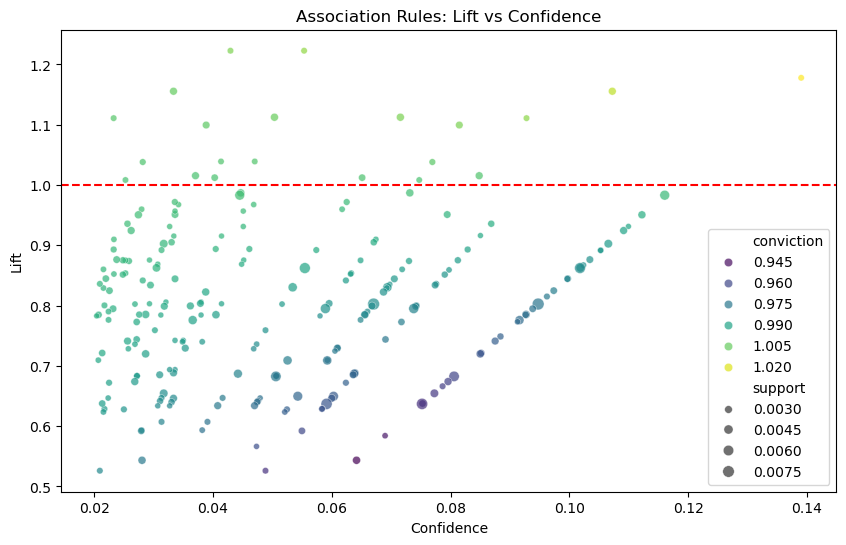


Actionable Rules:


,antecedents,consequents,support,confidence,lift
10,(bottled beer),(sausage),0.001942,0.055328,1.222755
9,(sausage),(bottled beer),0.001942,0.042925,1.222755
103,(ham),(whole milk),0.001870,0.139037,1.177794
89,(frankfurter),(other vegetables),0.003093,0.107232,1.155528
88,(other vegetables),(frankfurter),0.003093,0.033333,1.155528
...,...,...,...,...,...
183,(whipped/sour cream),(rolls/buns),0.001583,0.047312,0.566479
198,(root vegetables),(whole milk),0.003309,0.064156,0.543471
199,(whole milk),(root vegetables),0.003309,0.028032,0.543471
120,(other vegetables),(pastry),0.001942,0.020930,0.526132


In [35]:
# Add additional metrics (e.g., coverage, coverage ratio)
rules['coverage'] = rules['antecedents'].apply(
    lambda x: frequent_itemsets[frequent_itemsets['itemsets'] == x]['support'].values[0]
)
rules['zhang_metric'] = (rules['confidence'] - rules['consequent support']) / (1 - rules['consequent support'])

# Display Top Rules by Different Metrics
def display_top_rules(rules, metric='lift', top_n=5):
    return rules.sort_values(metric, ascending=False).head(top_n)

print("\nTop 5 Rules by Lift:")
display(display_top_rules(rules, 'lift'))

print("\nTop 5 Rules by Confidence:")
display(display_top_rules(rules, 'confidence'))

print("\nTop 5 Rules by Support:")
display(display_top_rules(rules, 'support'))

# Visualize Rule Quality
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='confidence', 
    y='lift', 
    size='support', 
    hue='conviction', 
    data=rules,
    alpha=0.7,
    palette='viridis'
)
plt.title('Association Rules: Lift vs Confidence')
plt.xlabel('Confidence')
plt.ylabel('Lift')
plt.axhline(1, linestyle='--', color='red')  # Lift=1 baseline
plt.show()

# Filter and Interpret Actionable Rules
actionable_rules = rules.sort_values('lift', ascending=False)

print("\nActionable Rules:")
display(actionable_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

#### Top 5 Rules by Lift
Lift measures how much more likely the consequent is to occur when the antecedent is present compared to when it is not.
- The top rule: (frankfurter) → (other vegetables) has the highest lift (1.155), indicating a positive association beyond chance.
- Other top pairs like (sausage) → (yogurt) and (shopping bags) → (soda) also show non-random associations.
- These rules have moderate confidence and low support, suggesting rare but strong links.

#### Top 5 Rules by Confidence
Confidence is the conditional probability of the consequent given the antecedent.
- The rule (sausage) → (whole milk) has the highest confidence (0.116), meaning when sausage is bought, whole milk is also bought 11.6% of the time.
- Rules like (frankfurter) → (whole milk) and (domestic eggs) → (whole milk) also show high confidence.
- Interestingly, many of these high-confidence rules have low lift, indicating that the high probability is influenced by the popularity of whole milk, not necessarily a strong association.

#### Top 5 Rules by Support
Support is the frequency of the combined items (antecedent + consequent) in transactions.
- The most frequent rule is (whole milk) → (rolls/buns) with support 0.0079 (i.e., in 0.79% of transactions).
- These rules reflect combinations of commonly purchased items.
- They usually have lower lift and confidence, suggesting they occur often but may not have strong predictive power.

#### Actionable Rules (Sorted by Lift)
These rules are filtered by descending lift, making them highly useful for business decision-making.

- Top actionable rule: (frankfurter) → (other vegetables) with highest lift (1.155), good confidence, but low support.
- Many rules in this list have moderate support and good confidence, suggesting niche but potentially valuable insights, like targeting customers buying frankfurter or sausage for promoting yogurt or other vegetables.

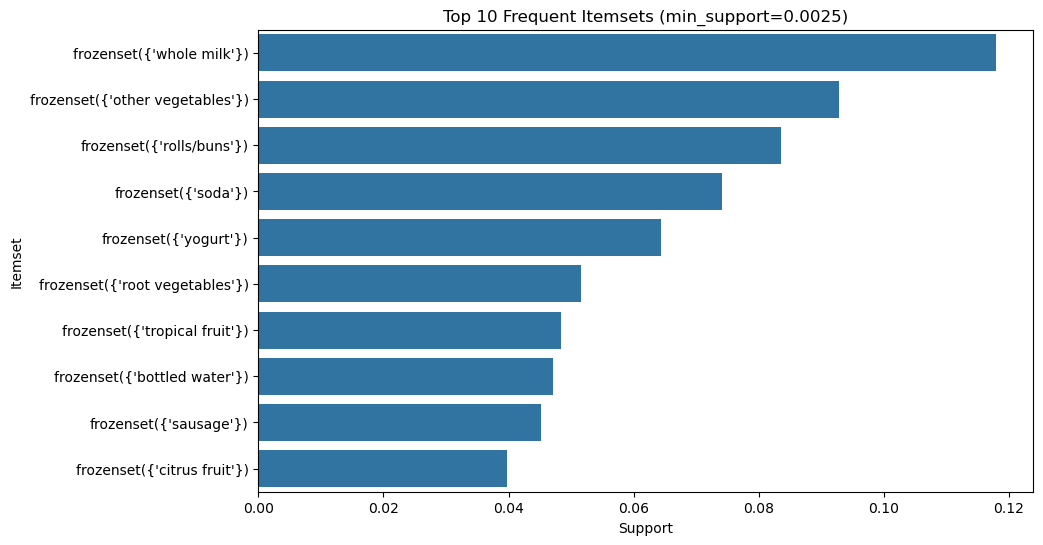

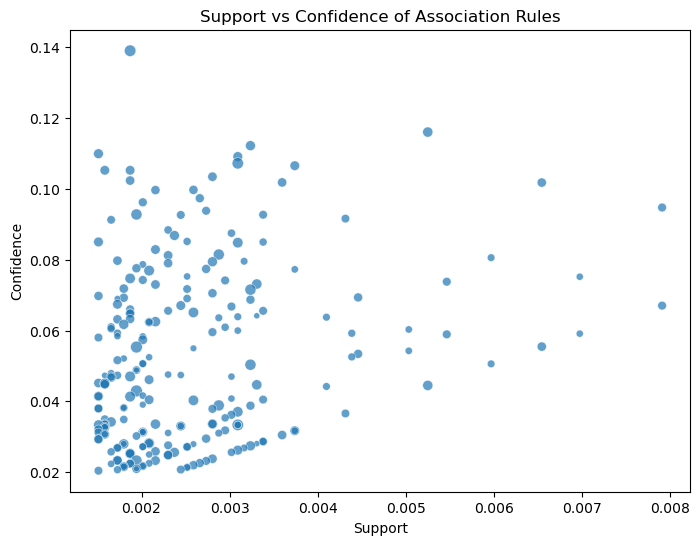

Text(0, 0.5, 'Frequency')

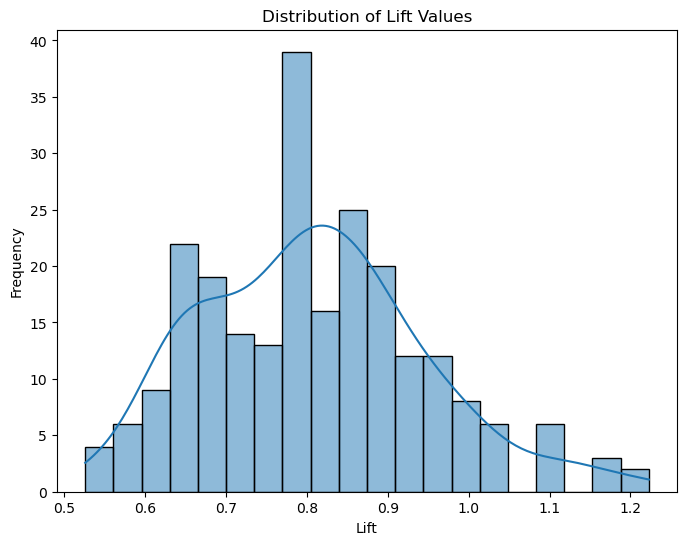

In [37]:
# Top N frequent itemsets
top_n = 10
top_itemsets = frequent_itemsets.sort_values('support', ascending=False).head(top_n)
plt.figure(figsize=(10,6))
sns.barplot(x='support', y=top_itemsets['itemsets'].astype(str), data=top_itemsets)
plt.title(f'Top {top_n} Frequent Itemsets (min_support={chosen_support})')
plt.xlabel('Support')
plt.ylabel('Itemset')
plt.show()

# Support vs Confidence Scatter Plot
plt.figure(figsize=(8,6))
sns.scatterplot(x='support', y='confidence', size='lift', data=rules, legend=False, alpha=0.7)
plt.title('Support vs Confidence of Association Rules')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

# Lift Distribution Histogram
plt.figure(figsize=(8,6))
sns.histplot(rules['lift'], bins=20, kde=True)
plt.title('Distribution of Lift Values')
plt.xlabel('Lift')
plt.ylabel('Frequency')
# plt.show()

#### Support vs Confidence of Association Rules
Most of the rules have low support (below 0.004) and moderate confidence (between 0.06 and 0.11), indicating that while the rules may not occur frequently, they are relatively reliable when they do. A few rules with higher support also show higher confidence, making them potentially more valuable for decision-making. The varying point sizes suggest that some of these rules, despite low support, still have a high lift, implying strong associations.

In [39]:
def recommend_items(items, rules, top_n=5):
    items_set = set(items)
    recommendations = {}

    for idx, row in rules.iterrows():
        antecedent = set(row['antecedents'])
        consequent = set(row['consequents'])

        # If all antecedent items are in the basket and none of the consequent items are
        if antecedent.issubset(items_set) and not consequent.issubset(items_set):
            for item in consequent:
                if item not in items_set:
                    # Keep the highest confidence for each recommended item
                    if item not in recommendations or recommendations[item] < row['confidence']:
                        recommendations[item] = row['confidence']

    # Sort recommendations by confidence, descending
    recommended_list = sorted(recommendations.items(), key=lambda x: x[1], reverse=True)
    return recommended_list[:top_n]


In [40]:
basket = ['frankfurter', 'sausage']
top_recs = recommend_items(basket, rules, top_n=3)
print("Recommendations:", top_recs)

Recommendations: [('whole milk', 0.11605723370429252), ('other vegetables', 0.10723192019950124), ('soda', 0.07313195548489666)]


In [41]:
basket = ['whole milk']
top_recs = recommend_items(basket, rules, top_n=3)
print("Recommendations:", top_recs)

Recommendations: [('rolls/buns', 0.06703229737964655), ('other vegetables', 0.059110298598415593), ('yogurt', 0.055453991468616695)]


In [42]:
def save_rules_to_csv(rules, filename='association_rules.csv'):
    # Convert frozensets in 'antecedents' and 'consequents' to strings for CSV readability
    rules_to_save = rules.copy()
    if 'antecedents' in rules_to_save.columns:
        rules_to_save['antecedents'] = rules_to_save['antecedents'].apply(lambda x: ', '.join(list(x)))
    if 'consequents' in rules_to_save.columns:
        rules_to_save['consequents'] = rules_to_save['consequents'].apply(lambda x: ', '.join(list(x)))

    rules_to_save.to_csv(filename, index=False)
    print(f"Rules saved to {filename}")


save_rules_to_csv(rules)


Rules saved to association_rules.csv


### 8. References

1. https://sarakmair.medium.com/market-basket-analysis-8dc699b7e27
2. https://www.datacamp.com/tutorial/apriori-algorithm
3. https://www.geeksforgeeks.org/implementing-apriori-algorithm-in-python/
4. https://medium.com/data-science/apriori-association-rule-mining-explanation-and-python-implementation-290b42afdfc6
6. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html
7. https://rasbt.github.io/mlxtend/user_guide/preprocessing/one-hot_encoding/
8. https://seaborn.pydata.org/tutorial/relational.html#relating-variables-with-scatter-plots
9. https://seaborn.pydata.org/generated/seaborn.barplot.html
10. https://seaborn.pydata.org/generated/seaborn.histplot.html

In [67]:
df = pd.read_csv("association_rules.csv")
    
# Extract the required columns
result_df = df[['antecedents', 'consequents']]
print(result_df)

          antecedents consequents
0                 ham  whole milk
1             sausage  whole milk
2         frankfurter  whole milk
3             waffles  whole milk
4       domestic eggs  whole milk
..                ...         ...
231  other vegetables   margarine
232  other vegetables      pastry
233        whole milk        beef
234        rolls/buns  newspapers
235              soda        curd

[236 rows x 2 columns]
